In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('DATA/solvay_conference.jpg', 0)

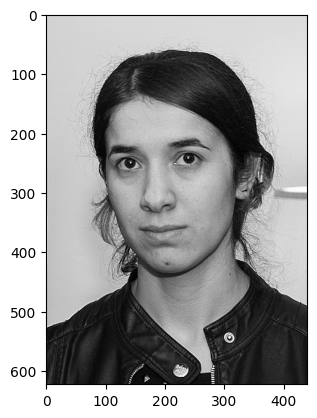

In [4]:
plt.imshow(nadia, cmap='gray')

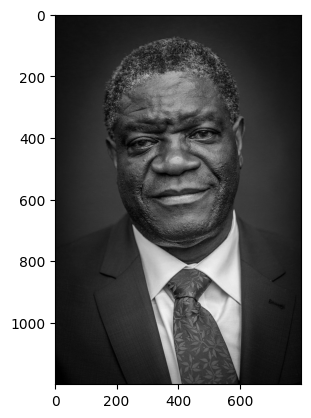

In [5]:
plt.imshow(denis, cmap='gray')

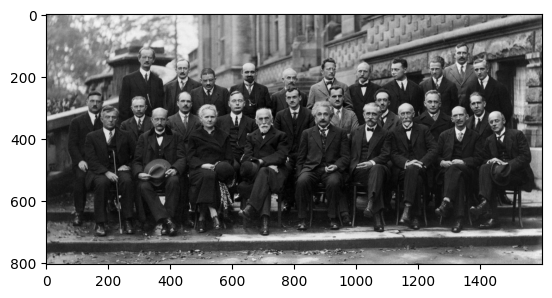

In [6]:
plt.imshow(solvay, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

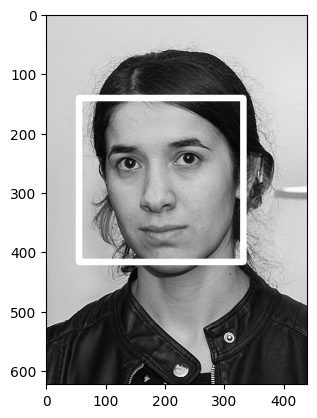

In [8]:
result = detect_face(nadia)
plt.imshow(result, cmap='gray')

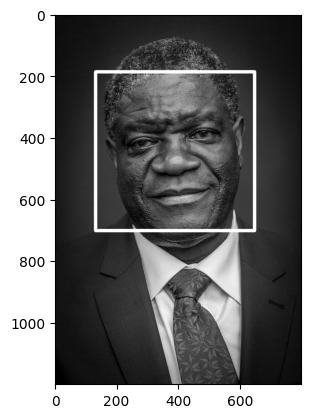

In [9]:
result = detect_face(denis)
plt.imshow(result, cmap='gray')

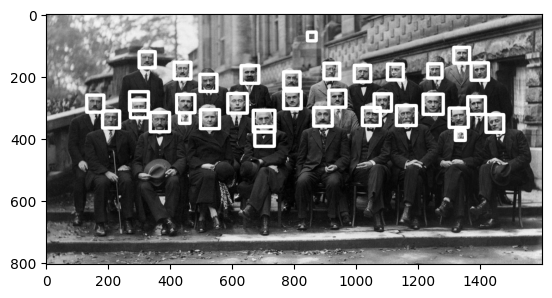

In [10]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

In [11]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

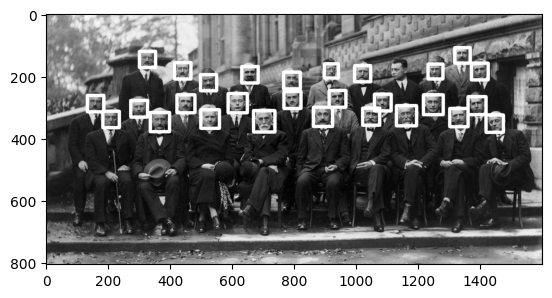

In [12]:
result = adj_detect_face(solvay)
plt.imshow(result, cmap='gray')

In [13]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

def detect_eyes(img):
    eye_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(eye_img)
    for (x, y, w, h) in eye_rects:
        cv2.rectangle(eye_img, (x, y), (x+w, y+h), (255, 255, 255), 10)

    return eye_img

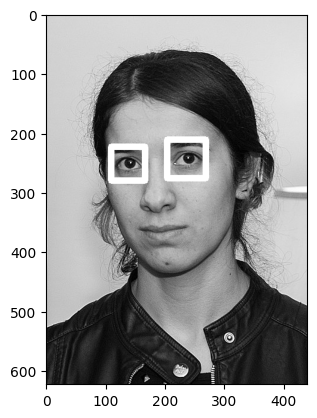

In [14]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

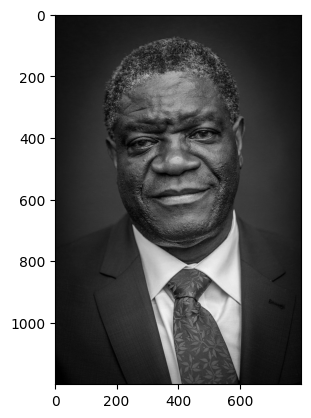

In [15]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray')

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video Face Detect', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()